<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Regularization and Optimization for Neural Networks

---

_Authors: Matt Brems and Justin Pounders (but mainly Matt)_

The principal topic of the day is **how to control bias/variance tradeoff in neural nets.**

### Learning Objectives

By the end of the lesson, students should be able to:
- Explain how L1/L2, dropout, and early stopping regularization work and implement these methods in Keras
- Implement methods for speeding up learning

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

import pandas as pd

%matplotlib inline

## Load the data

In [4]:
data = pd.read_csv('./data/cell_phone_churn.csv')
data.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
data.drop('state', axis=1, inplace=True); #state is not useful in analysiss, drop it
# many ways to binarize:
data['intl_plan'] = data['intl_plan'].map(lambda x: 1 if x=='yes' else 0)
data['vmail_plan'] = data['vmail_plan'].map(lambda x: 1 if x=='yes' else 0)
data.head()

,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
X = data.drop('churn', axis=1)
y = data.churn
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [10]:
ss = StandardScaler() #MUUUUST scale, for neural networks
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [12]:
# lets get the baseline score
1 - y.mean() #True is 1, 0 is False

0.8550855085508551

## Build a simple neural net to model churn

Let's build this:

- a dense network,
- one input layer,
- one hidden layer 
  - same number of nodes as input layer,
  - ReLU activation
- single node output (for binary classification)
  - sigmoid activation
  
> **Fun fact**: If we dropped the hidden layer, this model would just be logistic regression!  Can you prove that to yourself?

In [45]:
# Insert model here...
model = Sequential()
model.add(Dense(32,
               input_shape=(X_train_ss.shape[1],),
               activation='relu'))
model.add(Dense(1,  #only need 1 neuron cos this is binary classification. multiclass need as many no. as no. of classes
               activation='sigmoid'))

In [49]:
# Compile it
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
# Fit it
history = model.fit(X_train_ss, y_train, validation_data=[X_test_ss,y_test], 
                    batch_size=None, epochs=100, use_multiprocessing=True,
                   verbose=2) #removes progress bar

Train on 2499 samples, validate on 834 samples
Epoch 1/100
 - 0s - loss: 0.5692 - accuracy: 0.7283 - val_loss: 0.4555 - val_accuracy: 0.8345
Epoch 2/100
 - 0s - loss: 0.4092 - accuracy: 0.8511 - val_loss: 0.3828 - val_accuracy: 0.8561
Epoch 3/100
 - 0s - loss: 0.3616 - accuracy: 0.8587 - val_loss: 0.3526 - val_accuracy: 0.8609
Epoch 4/100
 - 0s - loss: 0.3396 - accuracy: 0.8623 - val_loss: 0.3367 - val_accuracy: 0.8633
Epoch 5/100
 - 0s - loss: 0.3251 - accuracy: 0.8675 - val_loss: 0.3258 - val_accuracy: 0.8645
Epoch 6/100
 - 0s - loss: 0.3136 - accuracy: 0.8727 - val_loss: 0.3135 - val_accuracy: 0.8693
Epoch 7/100
 - 0s - loss: 0.3023 - accuracy: 0.8764 - val_loss: 0.3016 - val_accuracy: 0.8717
Epoch 8/100
 - 0s - loss: 0.2911 - accuracy: 0.8840 - val_loss: 0.2913 - val_accuracy: 0.8753
Epoch 9/100
 - 0s - loss: 0.2804 - accuracy: 0.8860 - val_loss: 0.2800 - val_accuracy: 0.8837
Epoch 10/100
 - 0s - loss: 0.2702 - accuracy: 0.8960 - val_loss: 0.2702 - val_accuracy: 0.8885
Epoch 11/100

Epoch 87/100
 - 0s - loss: 0.1660 - accuracy: 0.9532 - val_loss: 0.1986 - val_accuracy: 0.9269
Epoch 88/100
 - 0s - loss: 0.1658 - accuracy: 0.9508 - val_loss: 0.1986 - val_accuracy: 0.9305
Epoch 89/100
 - 0s - loss: 0.1649 - accuracy: 0.9508 - val_loss: 0.1988 - val_accuracy: 0.9269
Epoch 90/100
 - 0s - loss: 0.1645 - accuracy: 0.9532 - val_loss: 0.2004 - val_accuracy: 0.9257
Epoch 91/100
 - 0s - loss: 0.1640 - accuracy: 0.9504 - val_loss: 0.1998 - val_accuracy: 0.9281
Epoch 92/100
 - 0s - loss: 0.1633 - accuracy: 0.9512 - val_loss: 0.1996 - val_accuracy: 0.9293
Epoch 93/100
 - 0s - loss: 0.1630 - accuracy: 0.9520 - val_loss: 0.1963 - val_accuracy: 0.9305
Epoch 94/100
 - 0s - loss: 0.1627 - accuracy: 0.9520 - val_loss: 0.1993 - val_accuracy: 0.9269
Epoch 95/100
 - 0s - loss: 0.1626 - accuracy: 0.9512 - val_loss: 0.1982 - val_accuracy: 0.9281
Epoch 96/100
 - 0s - loss: 0.1622 - accuracy: 0.9528 - val_loss: 0.1963 - val_accuracy: 0.9281
Epoch 97/100
 - 0s - loss: 0.1614 - accuracy: 0.95

Without regularization, **val_loss:**.

Plot loss

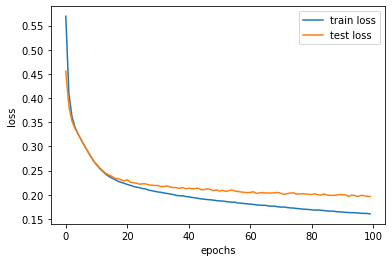

In [51]:
# Look, Ma, the machine is learning!
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

Plot accuracy

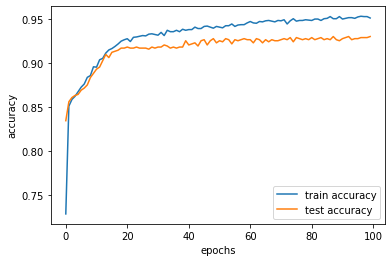

In [52]:
# Look, Ma, the machine is learning!
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend();

![](assets/overkill.jpg)

<a id='l1'></a>
## Regularization Method 1: L1 and L2 
---
Just as we did with linear and logistic regression, we can use `L1` and `L2` regularization on our neural networks.

Neural networks are just large combinations of linear functions that are modified using some activation function:

$$z = b_0 + \sum_{j=1}^p w_j x_j$$
$$a = g(z)$$

Where $x_j$ is one input (i.e. one observation's blood pressure, one observation's sex, etc.), $w_j$ is the weight/coefficient for that particular variable, $b_0$ is our bias, and $g$ is our activation function. If we used a sigmoid function as we would for logistic regression, $g$ would be:
$$g(z) = \frac{1}{1 + e^{-z}}$$

After we've done this for every node, we can then compute the loss for every node as a function of their parameters:
$$\text{loss} = \frac{1}{m}\sum_{i=1}^{m}L(\hat{y}_i, y_i)$$

This is our average loss. In a regression context, this is usually mean squared error; in a classification context this might be categorical cross-entropy or something else. This would be our loss function *without regularization*.

We'll then implement gradient descent:

$$w_j := w_j -\alpha\frac{\partial \text{loss}}{\partial w_j}$$

where $\alpha$ is our learning rate and $\frac{\partial \text{loss}}{\partial w_j}$ represents the partial derivative of our loss function with respect to our weight $w_j$.

This is how we implement gradient descent **without regularization**.

#### So, how do we implement gradient descent with `L1` or `L2` regularization?

> We just change the loss function to add a penalty! If we want to add a penalty term, we do the **exact same thing** we did with linear or logistic regression:

$$\text{L2 regularized loss} = \frac{1}{m}\sum_{i=1}^{m}L(\hat{y}_i, y_i) + \frac{\lambda}{2m}\sum_{l=1}^{L}||w_{[l]}||^2$$

Now, $$\frac{\partial \text{L2 regularized loss}}{\partial w_{[l]}} = \frac{\partial \text{loss}}{\partial w_j} + \frac{\lambda}{m}w_j$$
and
$$w_j := w_j -\alpha\frac{\partial \text{L2 regularized loss}}{\partial w_j}$$

In this example we used `L2` regularization, although `L1` works in the same way. You may see `L2` regularization referred to as "*weight decay*."

**Practical Note:** According to Andrew Ng, `L2` (as opposed to `L1`) is generally used for regularizing neural networks and it's rare to find `L1`.

As before, $\lambda$ is a hyperparameter to be selected by constructing multiple networks and identifying which value performs the best.
- Intuitively, as $\lambda \rightarrow \infty$, our weights get closer and closer to 0 (just like when we regularized our linear models before).
- Intuitively, as $\lambda \rightarrow \infty$, if we're using the `sigmoid` or `tanh` activation functions, we force our weights to stay in that "linear" region in the middle. This speeds up the learning process!

In [78]:
from keras import regularizers

model_l2 = Sequential()
model_l2.add(Dense(18,
                  input_dim=X_train_ss.shape[1],
                  activation='relu',
                  kernel_regularizer=regularizers.l2(0.01))) #0.01 is the lambda
model_l2.add(Dense(1,
                  activation='sigmoid',
                  kernel_regularizer=regularizers.l2(0.01)))

In [79]:
# Compile it
model_l2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
# Fit it
history_l2 = model_l2.fit(X_train_ss, y_train, validation_data=[X_test_ss,y_test], 
                    batch_size=None, epochs=100, use_multiprocessing=True,
                   verbose=2) 
# verbose = 2 removes progress bar
# use_multiprocessing utilises all CPU cores

Train on 2499 samples, validate on 834 samples
Epoch 1/100
 - 0s - loss: 0.7957 - accuracy: 0.6915 - val_loss: 0.6875 - val_accuracy: 0.8022
Epoch 2/100
 - 0s - loss: 0.6210 - accuracy: 0.8411 - val_loss: 0.5759 - val_accuracy: 0.8477
Epoch 3/100
 - 0s - loss: 0.5373 - accuracy: 0.8563 - val_loss: 0.5143 - val_accuracy: 0.8477
Epoch 4/100
 - 0s - loss: 0.4888 - accuracy: 0.8571 - val_loss: 0.4750 - val_accuracy: 0.8573
Epoch 5/100
 - 0s - loss: 0.4556 - accuracy: 0.8611 - val_loss: 0.4460 - val_accuracy: 0.8573
Epoch 6/100
 - 0s - loss: 0.4311 - accuracy: 0.8643 - val_loss: 0.4248 - val_accuracy: 0.8621
Epoch 7/100
 - 0s - loss: 0.4128 - accuracy: 0.8639 - val_loss: 0.4077 - val_accuracy: 0.8645
Epoch 8/100
 - 0s - loss: 0.3975 - accuracy: 0.8675 - val_loss: 0.3936 - val_accuracy: 0.8645
Epoch 9/100
 - 0s - loss: 0.3858 - accuracy: 0.8671 - val_loss: 0.3827 - val_accuracy: 0.8657
Epoch 10/100
 - 0s - loss: 0.3762 - accuracy: 0.8695 - val_loss: 0.3744 - val_accuracy: 0.8645
Epoch 11/100

Epoch 87/100
 - 0s - loss: 0.3101 - accuracy: 0.9052 - val_loss: 0.3074 - val_accuracy: 0.8993
Epoch 88/100
 - 0s - loss: 0.3105 - accuracy: 0.9076 - val_loss: 0.3084 - val_accuracy: 0.8933
Epoch 89/100
 - 0s - loss: 0.3103 - accuracy: 0.9072 - val_loss: 0.3068 - val_accuracy: 0.8993
Epoch 90/100
 - 0s - loss: 0.3099 - accuracy: 0.9068 - val_loss: 0.3072 - val_accuracy: 0.8993
Epoch 91/100
 - 0s - loss: 0.3103 - accuracy: 0.9064 - val_loss: 0.3095 - val_accuracy: 0.8957
Epoch 92/100
 - 0s - loss: 0.3102 - accuracy: 0.9032 - val_loss: 0.3092 - val_accuracy: 0.9005
Epoch 93/100
 - 0s - loss: 0.3103 - accuracy: 0.9056 - val_loss: 0.3092 - val_accuracy: 0.9005
Epoch 94/100
 - 0s - loss: 0.3099 - accuracy: 0.9080 - val_loss: 0.3092 - val_accuracy: 0.8957
Epoch 95/100
 - 0s - loss: 0.3102 - accuracy: 0.9024 - val_loss: 0.3084 - val_accuracy: 0.8981
Epoch 96/100
 - 0s - loss: 0.3102 - accuracy: 0.9060 - val_loss: 0.3090 - val_accuracy: 0.8969
Epoch 97/100
 - 0s - loss: 0.3097 - accuracy: 0.90

Plot loss (regularization vs no reg)

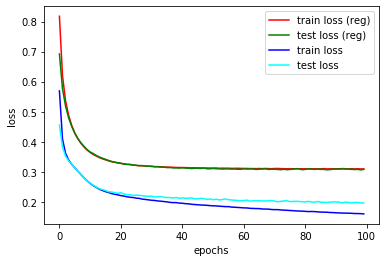

In [74]:
plt.plot(history_l2.history['loss'],label='train loss (reg)', color='red')
plt.plot(history_l2.history['val_loss'],label='test loss (reg)',color='green')
plt.plot(history.history['loss'],label='train loss',color='blue')
plt.plot(history.history['val_loss'],label='test loss',color='cyan')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

L2 may or may not improve score, as seen here. Or we can change lambda.

With `L2` regularization and $\lambda = 0.01$, **val_loss: **.

## Keras Resources
- [Keras Regularization Documentation](https://keras.io/regularizers/)
- [Kernel vs. Activity Regularizers](https://github.com/keras-team/keras/issues/3236)

## Tensorflow Resources
- [Implementation in Tensorflow](https://www.tensorflow.org/versions/r0.12/api_docs/python/contrib.layers/regularizers)
- [Example in Tensorflow](http://www.ritchieng.com/machine-learning/deep-learning/tensorflow/regularization/)

<a id='dropout'></a>
## Regularization Method 2: Dropout
---
There's another method of regularizing our terms that is specifically designed for neural networks, called **dropout regularization.**

Let's say we've constructed a neural network. We've decided on the number of layers we want and the number of nodes in each layer. (We might say that we've decided on the **topology** or **structure** of our network.)

![](./assets/original_nn.jpeg)

However, a densely connected network like this will almost certainly overfit. Our network is learning a parameter for every single connection.
> In the above example, we have 55 parameters being learned - and this is a very simple network, all things considered.

> We can overcome this by using **dropout regularization**. 

In dropout regularization, we randomly **drop** units (nodes) in our neural network ***during our training phase only***. We assign a probability of each node disappearing. Then, we essentially perform a coinflip for every node to turn that node "on" or "off."

Let's go through an example to illustrate this: For simplicity, we'll say we've assigned a 0.5 probability of keeping to every node in the network above. Then, for every node, we flip a coin, and if the coin lands on heads, the node remains, if it lands on tails, the node disappears. After we've done this for every node, we're left with a new network that looks something like this:

![](./assets/after_dropout.jpeg)

<!--
Image sources: https://pgaleone.eu/deep-learning/regularization/2017/01/10/anaysis-of-dropout/
Also, it seems, this site: http://cs231n.github.io/neural-networks-2/
-->

Let's explicitly lay out the general workflow you would follow:

1. Specify the **topology** of your neural network.
2. Initialize your weights and biases.
3. Specify the "keeping probabilities" for every node. (Generally, we'll assign the same probability to all nodes in each layer and usually the same probability to all hidden layers.)
4. Perform a "coin flip" for each node and drop out the chosen nodes.
5. Run through one epoch of training.
6. Repeat steps 4 and 5 for each epoch of training.

**Check:** If I drop out a node during one of my epochs, does it disappear from my final network?

#### So, what does this do?
<!-- <br/> -->
The intuition behind dropout is that, since each node has a probability of disappearing at any time, the neural network is disincentivized from allocating too much power to any one weight. It has a similar effect as imposing an L2 penalty: the magnitude of our weights shrinks.

**Check:** What might be some potential problems with doing this?

<!--
expected values of nodes changes; induces bias
-->

#### Inverted Dropout

In order to avoid any issues with the expected values of our nodes changing, we adjust our results accordingly by a method called **inverted dropout**.

If we have a hidden layer with 100 nodes and each node has a 80% probability of being "staying turned on," we only have 80% of those inputs to our node. As a result, we expect that the combined input to our node $z = b_0 + \sum_{i=1}^pw_ix_i$ will be off by about 20%. (Those interested in probability and research might note that the Binomial distribution is a very convenient model for neural networks and dropout.)

When using inverted dropout, we adjust $z$ by the "keeping probability."

$$
\begin{eqnarray*}
z_{original} &=& b_0 + \sum_{i=1}^pw_ix_i \\
\Rightarrow z_{dropout} &=& b_0 + \sum_{i\in\{included\_nodes\}}w_ix_i \\
\Rightarrow z_{inverted\_dropout} &:=& z_{dropout} / 0.8 \\
\end{eqnarray*}
$$

#### Test time:

So we've now run through every epoch of our training phase and we're ready to apply our neural network to our validation or testing data. Are we going to apply dropout to this data as well?

**NO.**

#### Best practices:

- Don't set any keeping probabilities for layers you where you don't want to drop any nodes. (What might be examples of these layers?)
<!--
Input and output layers
-->
- You'll generally want to specify a single keeping probability on all the layers on which you want to apply dropout, instead of specifying different keeping probabilities for each layer.

In [96]:
from keras.layers import Dropout

model_dropout = Sequential()
model_dropout.add(Dense(X_train_ss.shape[1],
                       input_dim=X_train_ss.shape[1],
                       activation='relu'))
# gotta add a dropout layer after EACH layer. Or, you can prefer NOT to apply dropout to certain layers 
model_dropout.add(Dropout(0.5)) #50% of the prior layer, stays alive in each epoch. Every epoch,
                                #the dead get revived, a new set of 50% neurons stays alive
model_dropout.add(Dense(1,
                       activation='sigmoid'))

In [97]:
model_dropout.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
history_dropout = model_dropout.fit(X_train_ss, y_train,validation_data=[X_test_ss,y_test],
                                   epochs=100, verbose=2)
# verbose = 2 removes progress bar
# use_multiprocessing utilises all CPU cores

Train on 2499 samples, validate on 834 samples
Epoch 1/100
 - 0s - loss: 0.7473 - accuracy: 0.5686 - val_loss: 0.5712 - val_accuracy: 0.7350
Epoch 2/100
 - 0s - loss: 0.5383 - accuracy: 0.7635 - val_loss: 0.4550 - val_accuracy: 0.8345
Epoch 3/100
 - 0s - loss: 0.4717 - accuracy: 0.8175 - val_loss: 0.4049 - val_accuracy: 0.8525
Epoch 4/100
 - 0s - loss: 0.4285 - accuracy: 0.8439 - val_loss: 0.3801 - val_accuracy: 0.8525
Epoch 5/100
 - 0s - loss: 0.4062 - accuracy: 0.8435 - val_loss: 0.3653 - val_accuracy: 0.8573
Epoch 6/100
 - 0s - loss: 0.3846 - accuracy: 0.8479 - val_loss: 0.3570 - val_accuracy: 0.8585
Epoch 7/100
 - 0s - loss: 0.3881 - accuracy: 0.8551 - val_loss: 0.3501 - val_accuracy: 0.8573
Epoch 8/100
 - 0s - loss: 0.3810 - accuracy: 0.8499 - val_loss: 0.3439 - val_accuracy: 0.8585
Epoch 9/100
 - 0s - loss: 0.3693 - accuracy: 0.8591 - val_loss: 0.3393 - val_accuracy: 0.8609
Epoch 10/100
 - 0s - loss: 0.3651 - accuracy: 0.8603 - val_loss: 0.3358 - val_accuracy: 0.8585
Epoch 11/100

Epoch 87/100
 - 0s - loss: 0.2673 - accuracy: 0.9040 - val_loss: 0.2272 - val_accuracy: 0.9101
Epoch 88/100
 - 0s - loss: 0.2543 - accuracy: 0.9076 - val_loss: 0.2253 - val_accuracy: 0.9149
Epoch 89/100
 - 0s - loss: 0.2527 - accuracy: 0.9084 - val_loss: 0.2237 - val_accuracy: 0.9137
Epoch 90/100
 - 0s - loss: 0.2571 - accuracy: 0.9020 - val_loss: 0.2238 - val_accuracy: 0.9149
Epoch 91/100
 - 0s - loss: 0.2559 - accuracy: 0.9084 - val_loss: 0.2238 - val_accuracy: 0.9161
Epoch 92/100
 - 0s - loss: 0.2576 - accuracy: 0.8996 - val_loss: 0.2235 - val_accuracy: 0.9173
Epoch 93/100
 - 0s - loss: 0.2647 - accuracy: 0.9020 - val_loss: 0.2246 - val_accuracy: 0.9125
Epoch 94/100
 - 0s - loss: 0.2554 - accuracy: 0.9064 - val_loss: 0.2240 - val_accuracy: 0.9137
Epoch 95/100
 - 0s - loss: 0.2538 - accuracy: 0.9096 - val_loss: 0.2221 - val_accuracy: 0.9161
Epoch 96/100
 - 0s - loss: 0.2562 - accuracy: 0.9040 - val_loss: 0.2237 - val_accuracy: 0.9125
Epoch 97/100
 - 0s - loss: 0.2605 - accuracy: 0.90

With Dropout, **val_loss: **.

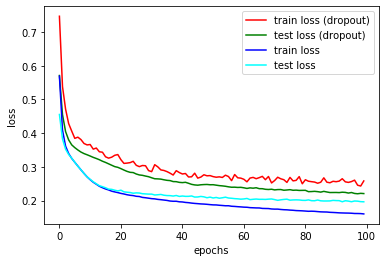

In [101]:
plt.plot(history_dropout.history['loss'],label='train loss (dropout)', color='red')
plt.plot(history_dropout.history['val_loss'],label='test loss (dropout)',color='green')
plt.plot(history.history['loss'],label='train loss',color='blue')
plt.plot(history.history['val_loss'],label='test loss',color='cyan')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

With dropout, its worse, but its more generalised, which arguably is better.

## Keras Resources
- [Keras Dropout Documentation](https://keras.io/layers/core/#dropout)

## Tensorflow Resources
- [Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/nn/dropout)
- [List of examples in Tensorflow](https://programtalk.com/python-examples/tensorflow.nn.dropout/)

<a id='stopping'></a>
## Regularization Method 3: Early Stopping
---
The third method of regularization that we'll discuss today is called early stopping.
</br>
If we run though all our epochs of training and plot both our training and validation error, we'll typically see something like this:

![](./assets/train-val-error-reduced.png)
*source: [Prechelt, 1997](http://page.mi.fu-berlin.de/prechelt/Biblio/stop_tricks1997.pdf) *

**Check:** What is happening in this plot?

Early stopping does exactly what its name implies: it stop the training process early. Instead of continuing training through every epoch, once the validation error begins to increase, our algorithm stops because it has (in theory) found the minimum for the validation loss.

This might seem like a simple and robust solution to overfitting, but it can run into problems.

<details>
![](./assets/validation-error-real.png)
</details>

There is debate over how often this problem occurs. You can generally plot both the training and validation loss, see if you're getting multiple optima. If you are, there are multiple suggested techniques to combat this problem in the [paper reference above](http://page.mi.fu-berlin.de/prechelt/Biblio/stop_tricks1997.pdf).

In [119]:
from keras.callbacks import EarlyStopping

model_es = Sequential()
model_es.add(Dense(X_train_ss.shape[1],
                  input_dim=X_train_ss.shape[1],
                  activation='relu'))
model_es.add(Dense(1,
                  activation='sigmoid'))

In [120]:
model_es.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [121]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=5, mode='auto')

In [122]:
history_es = model_es.fit(X_train_ss, y_train, validation_data=[X_test_ss,y_test],epochs=100,
             callbacks=[early_stop],verbose=2,use_multiprocessing=True)
# verbose = 2 removes progress bar
# use_multiprocessing utilises all CPU cores

Train on 2499 samples, validate on 834 samples
Epoch 1/100
 - 1s - loss: 0.6718 - accuracy: 0.6198 - val_loss: 0.5317 - val_accuracy: 0.8177
Epoch 2/100
 - 0s - loss: 0.4680 - accuracy: 0.8471 - val_loss: 0.4188 - val_accuracy: 0.8525
Epoch 3/100
 - 0s - loss: 0.3911 - accuracy: 0.8575 - val_loss: 0.3697 - val_accuracy: 0.8585
Epoch 4/100
 - 0s - loss: 0.3535 - accuracy: 0.8615 - val_loss: 0.3420 - val_accuracy: 0.8609
Epoch 5/100
 - 0s - loss: 0.3295 - accuracy: 0.8659 - val_loss: 0.3238 - val_accuracy: 0.8597
Epoch 6/100
 - 0s - loss: 0.3130 - accuracy: 0.8747 - val_loss: 0.3110 - val_accuracy: 0.8621
Epoch 7/100
 - 0s - loss: 0.3007 - accuracy: 0.8832 - val_loss: 0.3001 - val_accuracy: 0.8621
Epoch 8/100
 - 0s - loss: 0.2902 - accuracy: 0.8876 - val_loss: 0.2905 - val_accuracy: 0.8729
Epoch 9/100
 - 0s - loss: 0.2815 - accuracy: 0.8904 - val_loss: 0.2827 - val_accuracy: 0.8741
Epoch 10/100
 - 0s - loss: 0.2736 - accuracy: 0.8944 - val_loss: 0.2762 - val_accuracy: 0.8765
Epoch 11/100

Notice that early stopping stopped after 5x of trying to reduce val_loss (0.2161 dropped to 0.2152, but followed by 5x of val_loss values that arent lower than 0.2152), but not being successful in doing so. Hence, stopped early.

With early stopping, **val_loss:**.

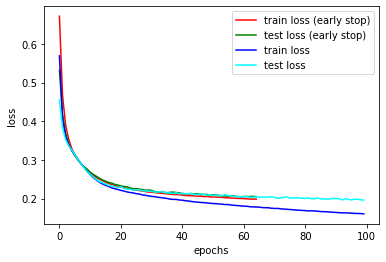

In [123]:
plt.plot(history_es.history['loss'],label='train loss (early stop)', color='red')
plt.plot(history_es.history['val_loss'],label='test loss (early stop)',color='green')
plt.plot(history.history['loss'],label='train loss',color='blue')
plt.plot(history.history['val_loss'],label='test loss',color='cyan')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

## Keras Resources
- [Keras EarlyStopping Documentation](https://keras.io/callbacks/#earlystopping)
- [Keras EarlyStopping Example](http://parneetk.github.io/blog/neural-networks-in-keras/)

## Tensorflow Resources
- [Tensorflow.Keras.callbacks.EarlyStopping Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

<a id='conclusion'></a>
# Conclusion

Today, we learned about three different methods of regularizing our neural networks: `L2` regularization, dropout, and early stopping.

## Machine Learning Workflow

As promised, managing bias and variance takes a lot of our attention. If our bias or variance are high, it's likely that our model isn't performing as well as it could.

A workflow for how you should address this (in the context of neural networks and beyond) is as follows:

- Do we have high bias? (i.e. are we performing poorly on our training set?)
    - If so:
        - let's build a more complex model / bigger network!
        - let's consider a new architecture for our neural network!
        - let's train longer!
- Do we have high variance? (i.e. are we performing poorly on our test/holdout set?)
    - If so:
        - let's gather more data!
            - Usually very difficult, but we should use "data augmentation" if we can!
        - let's build a simpler model / smaller network!
        - let's consider a new architecture for our neural network!
        - let's regularize!
    - Once we're satisfied, return to the bias question and repeat.
    
**Note:** Before deep learning, most tools for handling high bias or high variance adversely affected the other. However, depending on the amount of data we have and how complex our network is, it's often the case that we can drastically reduce variance with out affecting bias.

<a id='references'></a>
## References and Resources:

- [DeepLearning.ai](https://www.deeplearning.ai/), Andrew Ng's Coursera course on Deep Learning
  - The videos from this course are on a [YouTube Channel](https://www.youtube.com/channel/UCcIXc5mJsHVYTZR1maL5l9w/featured)   
<br>
- [Deep Learning Book](http://www.deeplearningbook.org/), textbook written by Ian Goodfellow, creator of Generative Adversarial Networks (GANs)